# Special Distributions and the Likelihood Function


## Special Distributions

### Normal distribution


In [5]:
# We're going to use data from the ALA library, a collection of pulmonary
# function in females in Topeka, Kansas. Parameter of interest is logFEV1.

install.packages("ALA", repos = "http://R-Forge.R-project.org")
library(ALA)
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
# Load data for children between 10 and 11 years old and retrieve the raw values
# for FEV1 by taking the exponent of logFEV1.
fev1_df <- fev1 %>%
  filter(age > 10, age < 11) %>%
  mutate(FEV1 = exp(logFEV1))

#### Visualising data

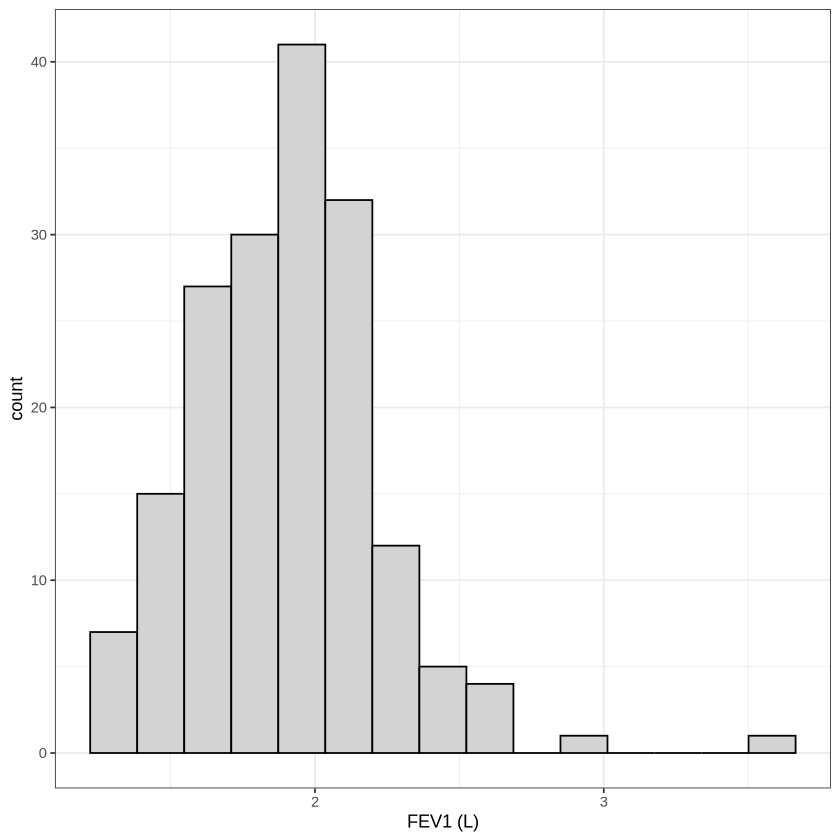

In [7]:
# Let's look at the data and see if it's normal.
ggplot(data = fev1_df) +
  geom_histogram(aes(x = FEV1),
    bins = 15,
    fill = "lightgray",
    col = "black"
  ) +
  xlab("FEV1 (L)") +
  theme_bw()

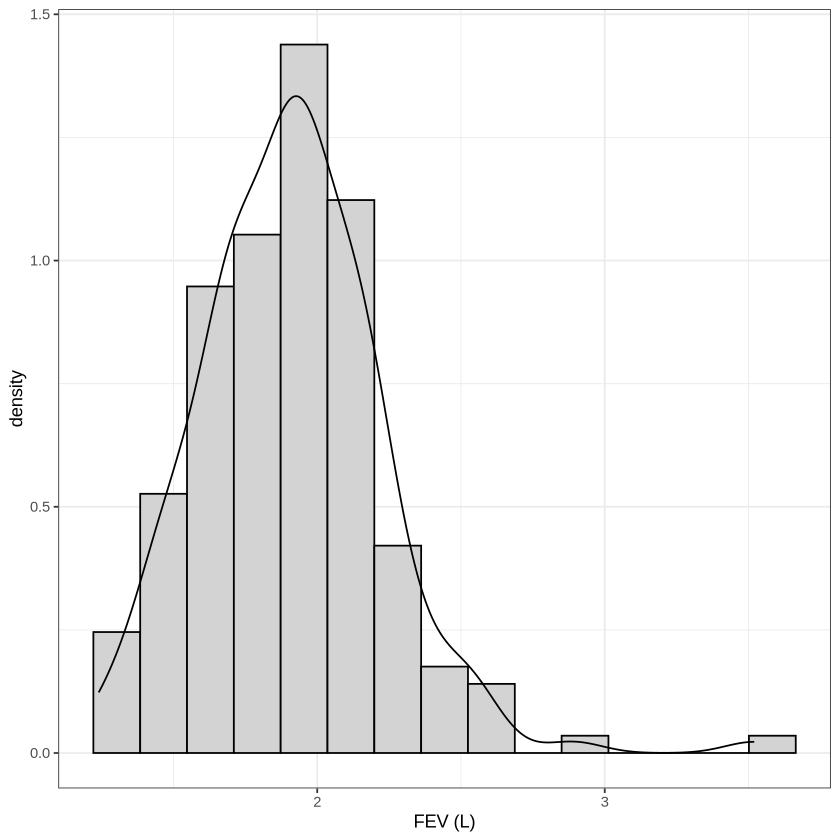

In [8]:
# We don't know the true shape of the density function yet.
# Let's add an estimated density curve R (can do this to a plot automatically).
ggplot(data = fev1_df) +
  geom_histogram(aes(x = FEV1, y = after_stat(density)), # change to density
    bins = 15,
    fill = "lightgray",
    col = "black"
  ) +
  geom_density(aes(x = FEV1)) + # added a new line here
  xlab("FEV (L)") +
  theme_bw()


In [9]:
# We can also estimate the density function ourselves by estimating our
# parameters, x-bar and s.
x_bar <- mean(fev1_df$FEV1); x_bar
s_est <- sd(fev1_df$FEV1); s_est

[1] 1.911657

[1] 0.3139372

#### Fitting a normal distribution to data.


In [10]:
# These two parameters uniquely define the normal function
?dnorm # (density function)

Normal {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
mean,vector of means.
sd,vector of standard deviations.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X \le x] otherwise, P[X > x]."


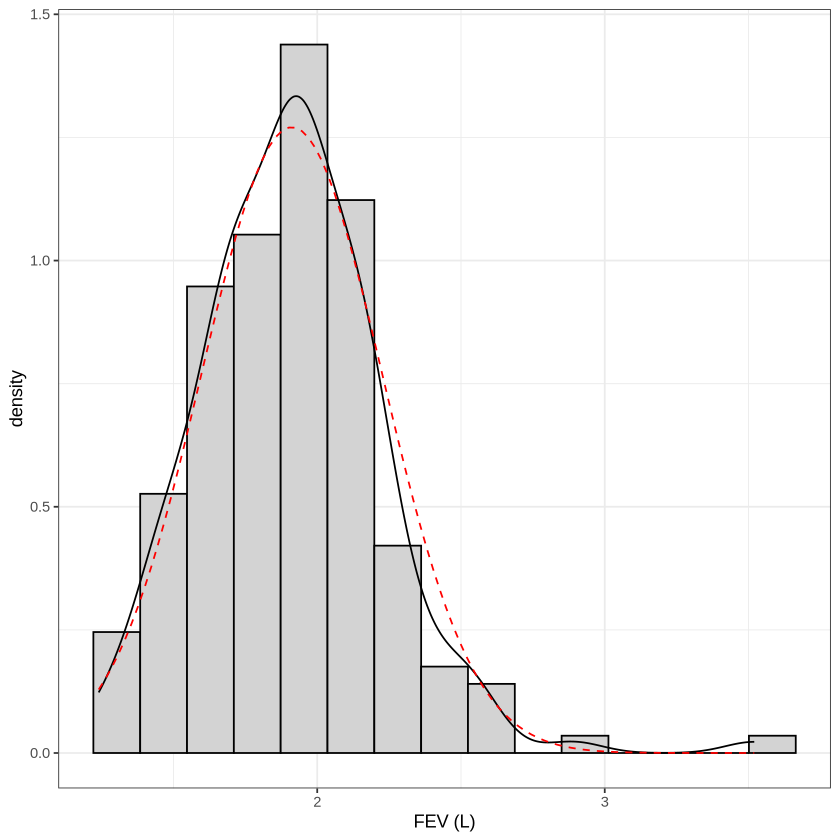

In [11]:
# More or less same plotting code as before, but now we add a code to draw
# our estimated Normal distribution.
ggplot(data = fev1_df) +
  geom_histogram(aes(x = FEV1, y = after_stat(density)),
    bins = 15,
    fill = "lightgray",
    col = "black"
  ) +
  geom_density(aes(x = FEV1)) +
  stat_function(
    fun = dnorm, col = "red", linetype = "dashed", 
    args = list(mean = x_bar, sd = s_est)
  ) +
  xlab("FEV (L)") +
  theme_bw()

#### Calculating probabilities using the normal distribution

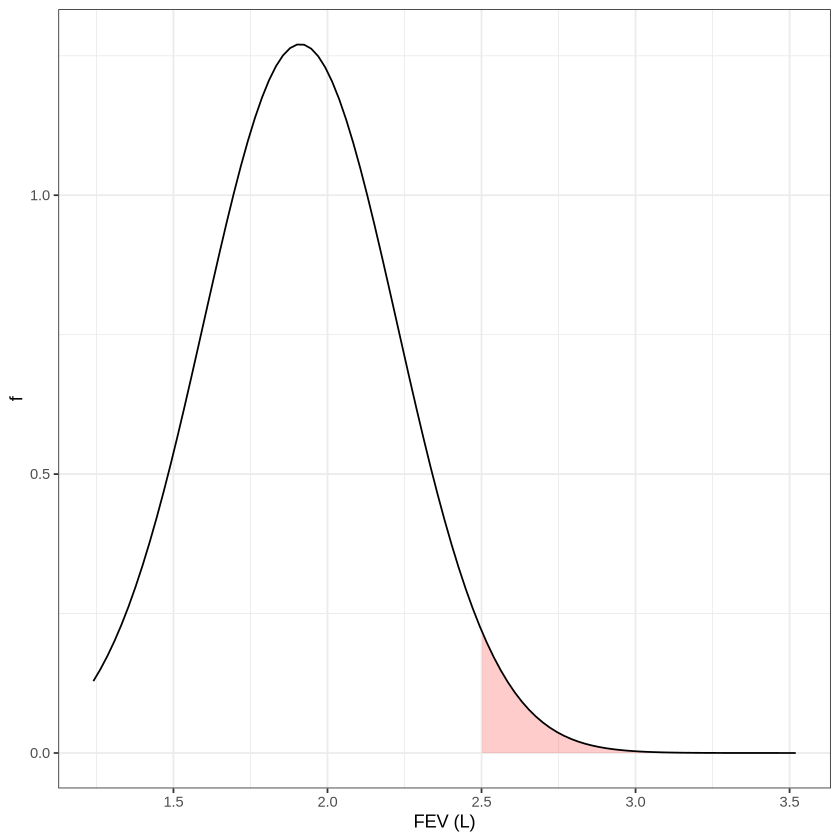

In [13]:
# Can use our estimated Normal distribution as a model describing lung function
# in our population - 10 year old girls in Topeka.

# We can use this distribution to answer questions!

# [Q1] What is the probability a 10 year old from Topeka has FEV1 > 2.5L?
ggplot(data = fev1_df, aes(x = FEV1)) +
  geom_area(
    stat = "function", fun = dnorm,
    args = list(mean = x_bar, sd = s_est),
    fill = "red", alpha = 0.2,
    xlim = c(2.5, max(fev1_df$FEV1))
  ) +
  stat_function(
    fun = dnorm, col = "black",
    args = list(mean = x_bar, sd = s_est)
  ) +
  labs(x = "FEV (L)", y = "f") +
  theme_bw()

In [14]:
# Answer? Use the pnorm function!
pnorm(q = 2.5, mean = x_bar, sd = s_est, lower.tail = FALSE)

[1] 0.03045975

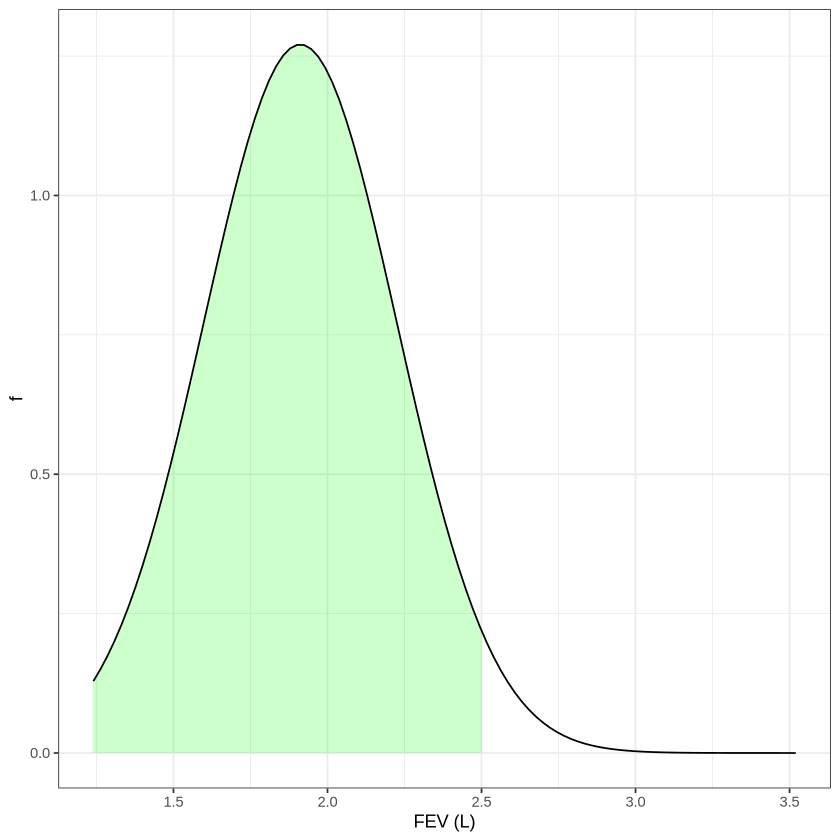

In [15]:
# Alternative, can think the opposite way and achieve the same result!
ggplot(data = fev1_df, aes(x = FEV1)) +
  geom_area(
    stat = "function", fun = dnorm,
    args = list(mean = x_bar, sd = s_est),
    fill = "green", alpha = 0.2,
    xlim = c(min(fev1_df$FEV1), 2.5)
  ) +
  stat_function(
    fun = dnorm, col = "black",
    args = list(mean = x_bar, sd = s_est)
  ) +
  labs(x = "FEV (L)", y = "f") +
  theme_bw()


In [16]:
1 - pnorm(q = 2.5, mean = x_bar, sd = s_est)

[1] 0.03045975

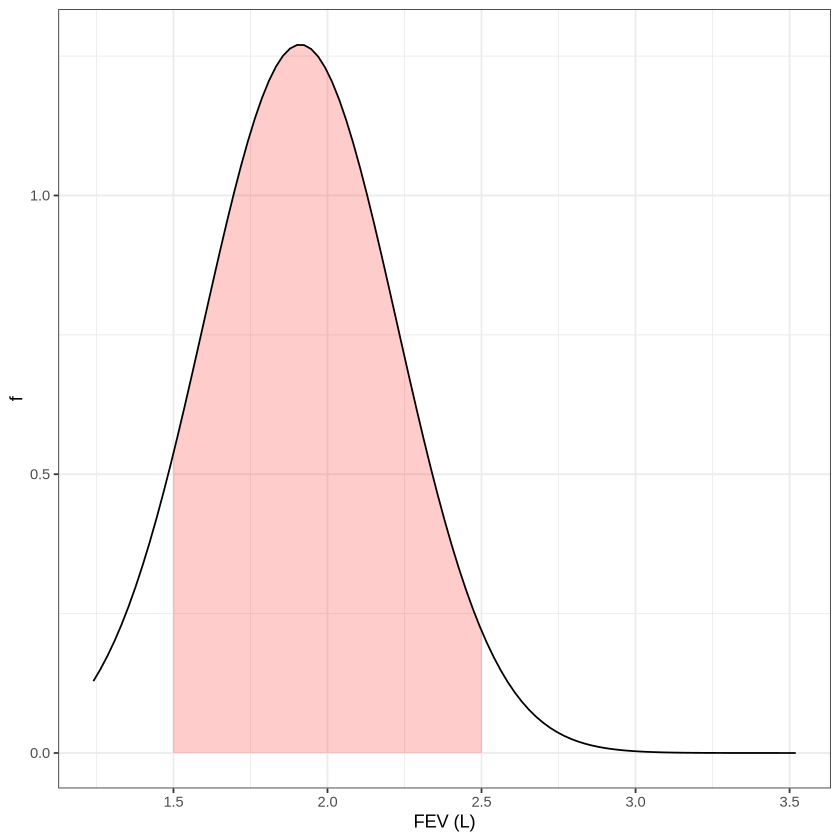

In [17]:
# [Q2] What proportion of the population has FEV between 1.5 and 2.5 L?
ggplot(data = fev1_df, aes(x = FEV1)) +
  geom_area(
    stat = "function", fun = dnorm,
    args = list(mean = x_bar, sd = s_est),
    fill = "red",
    xlim = c(1.5, 2.5),
    alpha = 0.2
  ) +
  stat_function(
    fun = dnorm, col = "black",
    args = list(mean = x_bar, sd = s_est)
  ) +
  labs(x = "FEV (L)", y = "f") +
  theme_bw()

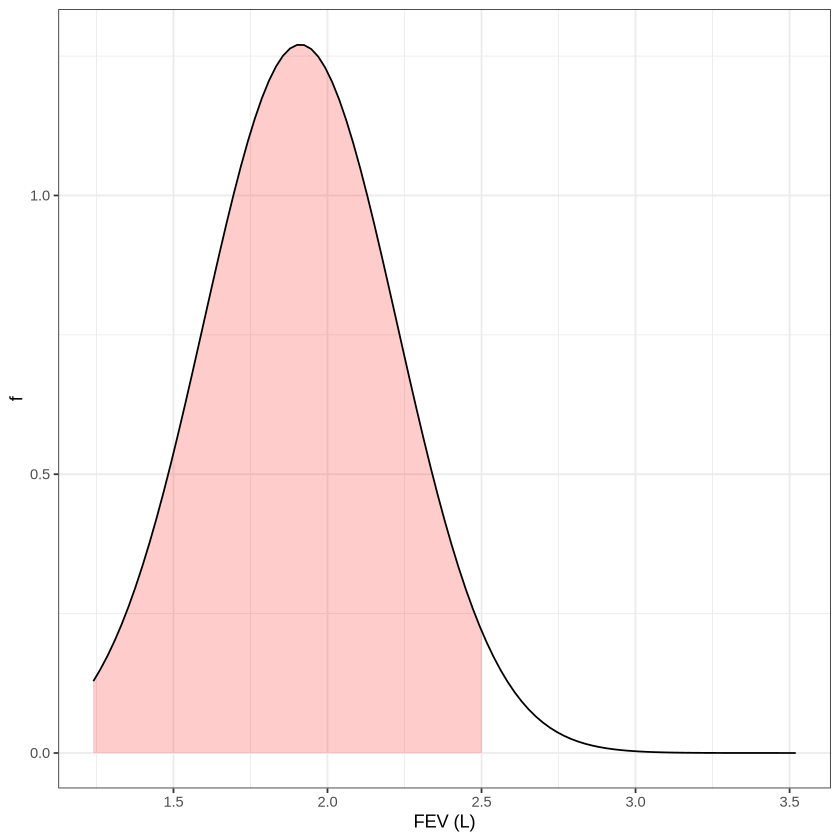

In [19]:
# which is the same as the area less than the right-most bound...
ggplot(data = fev1_df, aes(x = FEV1)) +
  geom_area(
    stat = "function", fun = dnorm,
    args = list(mean = x_bar, sd = s_est),
    fill = "red",
    xlim = c(min(fev1_df$FEV1), 2.5),
    alpha = 0.2
  ) +
  stat_function(
    fun = dnorm, col = "black",
    args = list(mean = x_bar, sd = s_est)
  ) +
  labs(x = "FEV (L)", y = "f") +
  theme_bw()

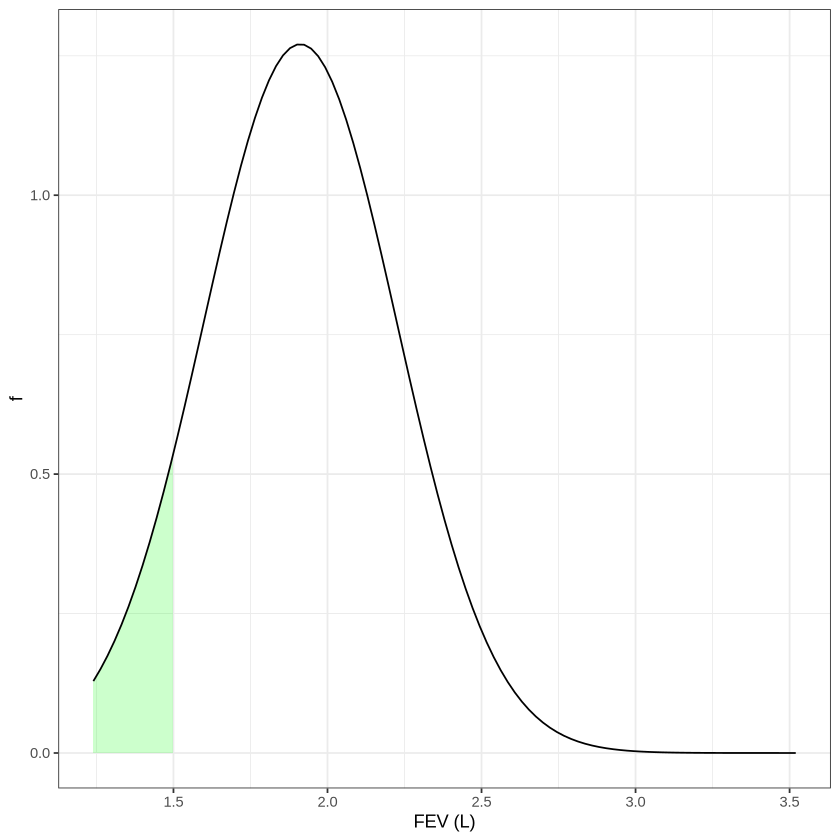

In [18]:
# ...Minus the area less than the left-most bound!
ggplot(data = fev1_df, aes(x = FEV1)) +
  geom_area(
    stat = "function", fun = dnorm,
    args = list(mean = x_bar, sd = s_est),
    fill = "green",
    xlim = c(min(fev1_df$FEV1), 1.5),
    alpha = 0.2
  ) +
  stat_function(
    fun = dnorm, col = "black",
    args = list(mean = x_bar, sd = s_est)
  ) +
  labs(x = "FEV (L)", y = "f") +
  theme_bw()

In [20]:
# first thing minus the second  thing
pnorm(q = 2.5, mean = x_bar, sd = s_est) -
  pnorm(q = 1.5, mean = x_bar, sd = s_est)


[1] 0.8746572

In [21]:
# What is value of FEV that only 5% of the population exceeds?

# (Can't plot a picture yet - need to know the range for shading)

# using qnorm and the upper tail.
q_est <- qnorm(p = 0.05, mean = x_bar, sd = s_est, lower.tail = FALSE); q_est

# using qnorm and the lower tail.
q_est <- qnorm(p = 1 - 0.05, mean = x_bar, sd = s_est); q_est

[1] 2.428038

[1] 2.428038

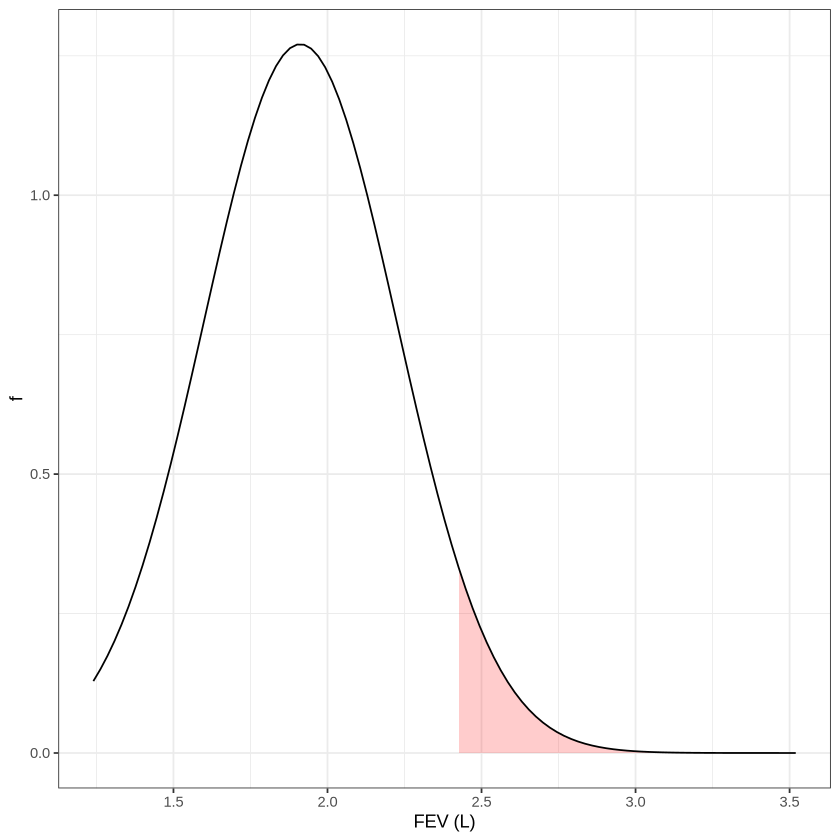

In [23]:
# Then we can use the value in our ggplot function.
ggplot(data = fev1_df, aes(x = FEV1)) +
  geom_area(
    stat = "function", fun = dnorm,
    args = list(mean = x_bar, sd = s_est),
    fill = "red",
    xlim = c(q_est, max(fev1_df$FEV1)),
    alpha = 0.2
  ) +
  stat_function(
    fun = dnorm, col = "black",
    args = list(mean = x_bar, sd = s_est)
  ) +
  labs(x = "FEV (L)", y = "f") +
  theme_bw()

#### Q-Q Plots

In [25]:
# We'll start by making a standardised version of FEV1. This is easy using R.
fev1_df <-
  mutate(fev1_df,
    FEV.std = (FEV1 - mean(FEV1)) /
      sd(FEV1)
  )

In [26]:
# confirm mean is aprox 0 and sd == 1
mean(fev1_df$FEV.std)
sd(fev1_df$FEV.std)

[1] -2.660112e-16

[1] 1

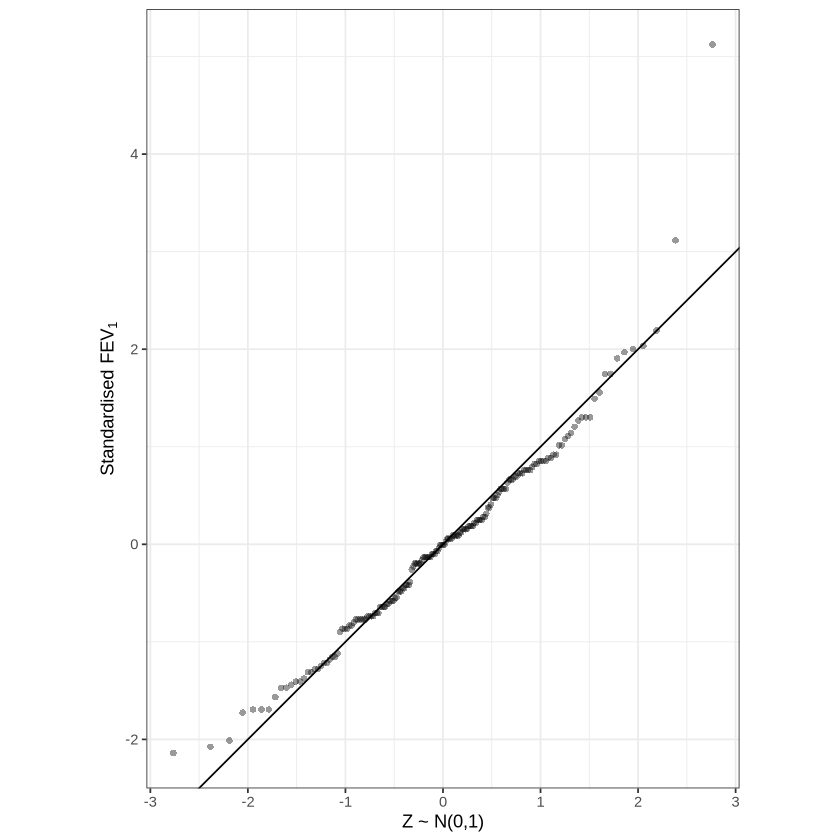

In [27]:
# Now we plot the result, using stat_qq from the ggplot2 library.
fev1_dfqq <- ggplot(
  data = fev1_df,
  aes(sample = FEV.std)
) +
  stat_qq(alpha = 0.4, geom = "point", pch = 16) +
  coord_equal() +
  geom_abline() +
  theme_bw() +
  xlab("Z ~ N(0,1)") +
  ylab(expression(Standardised ~ FEV[1]))

fev1_dfqq

### Student's $t$ distribution

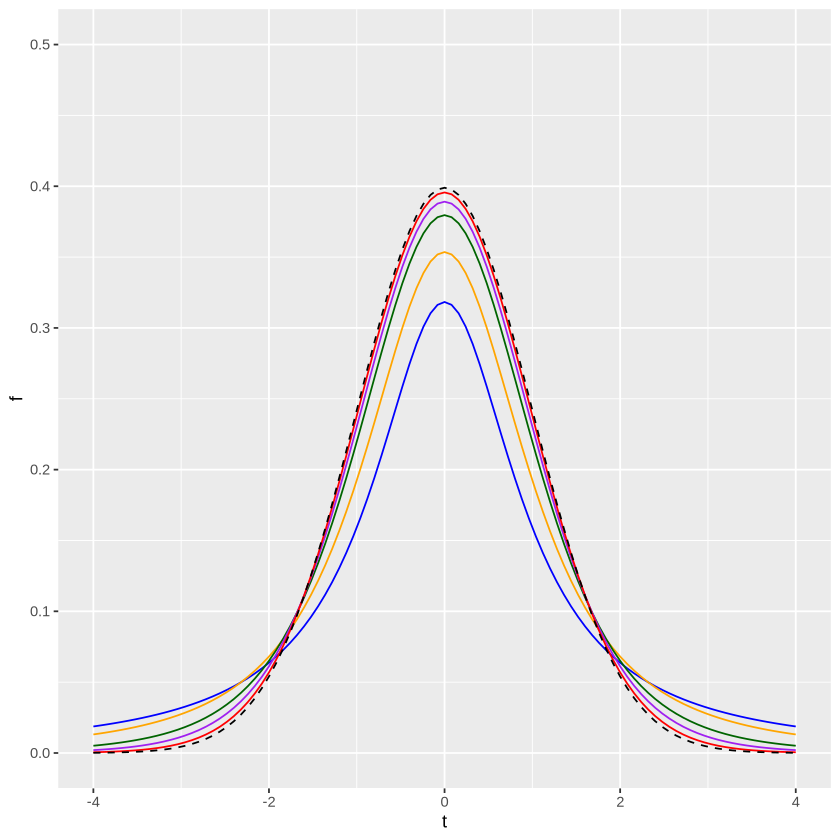

In [29]:
# We can show how the t distribution changes with sample size using ggplot.
ggplot(data = data.frame(x = c(-4, 4)), aes(x = x)) +
  stat_function(fun = dt, col = "blue", args = list(df = 1)) +
  stat_function(fun = dt, col = "orange", args = list(df = 2)) +
  stat_function(fun = dt, col = "darkgreen", args = list(df = 5)) +
  stat_function(fun = dt, col = "purple", args = list(df = 10)) +
  stat_function(fun = dt, col = "red", args = list(df = 30)) +
  stat_function(fun = dnorm, col = "black", linetype = "dashed") +
  labs(x = "t", y = "f") +
  ylim(c(0, 0.5))

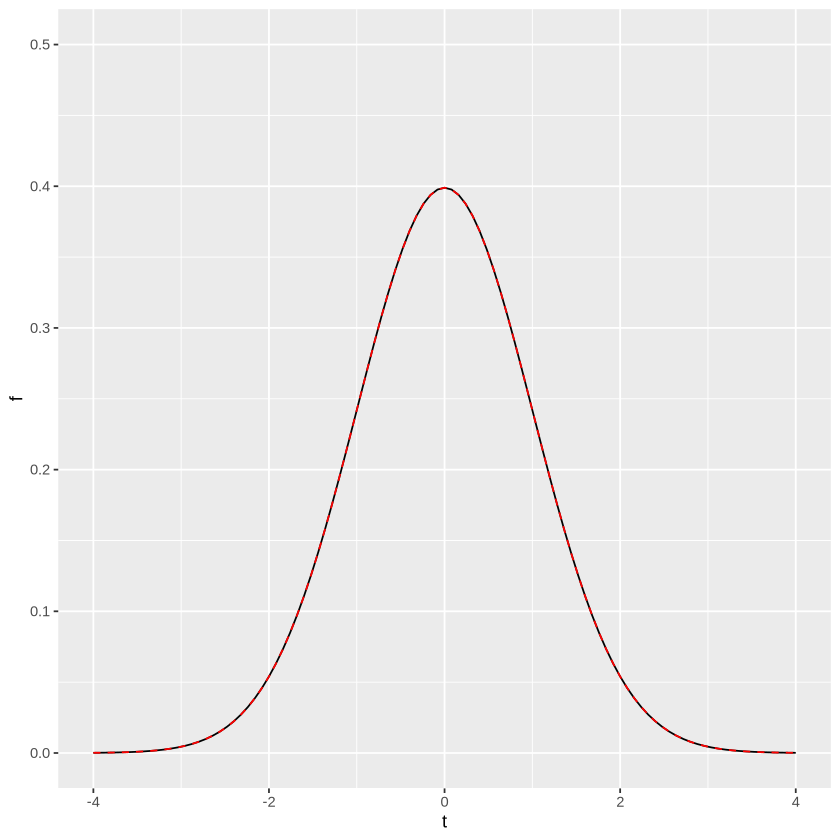

In [30]:
ggplot(data = data.frame(x = c(-4, 4)), aes(x = x)) +
  stat_function(fun = dt, args = list(df = Inf)) +
  labs(x = "t", y = "f") +
  ylim(c(0, 0.5)) +
  stat_function(fun = dnorm, col = "red", linetype = "dashed")

### Exponential distribution

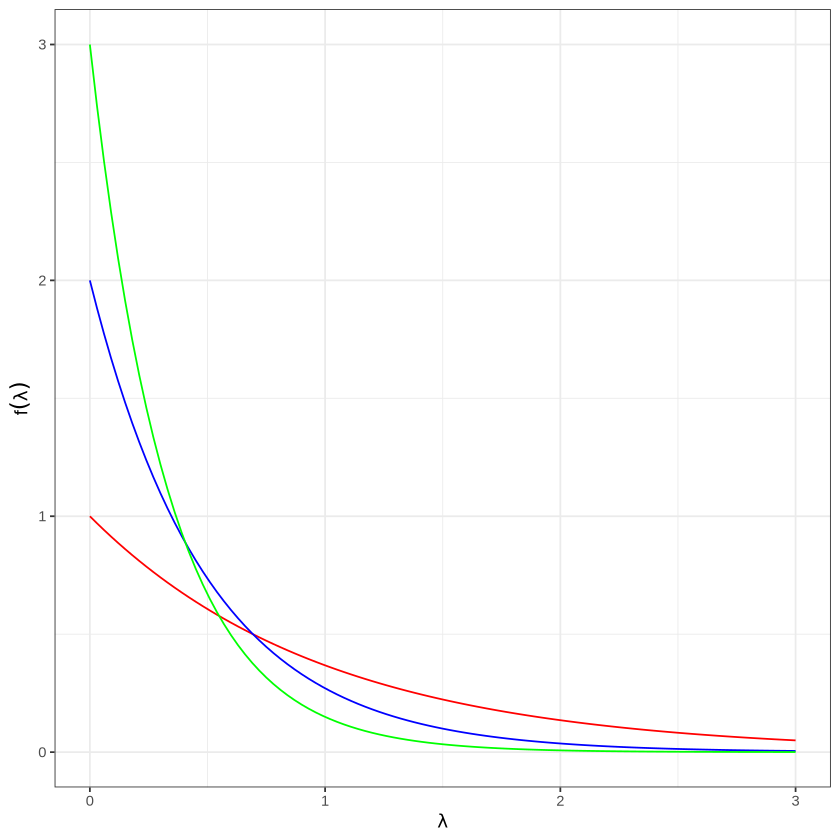

In [35]:
# Let's look at three different rates visually.
ggplot(data.frame(x = c(0, 3)), aes(x = x)) +
  stat_function(fun = dexp, args = list(rate = 1), colour = "red") +
  stat_function(fun = dexp, args = list(rate = 2), colour = "blue") +
  stat_function(fun = dexp, args = list(rate = 3), colour = "green") +
  labs(x = expression(lambda),y = expression(f(lambda)) ) +
  theme_bw()

# As lambda increases, the density shifts to earlier in the distribution.
# i.e., as the rate per time step (lambda) increases, the average time between
# events decreases.

## The Likelihood Function

Consider ten randomly generated exponential observations, with $\lambda=2$. $$X_{i}, ..., X_{n} \sim Exp(\lambda)$$

In [31]:
# generate a specific set of random numbers
set.seed(125) # setting the seed means we can get the same numbers again
rand_vals <- rexp(10, 2)
rand_vals

[1] 0.32467441 1.14361679 0.18475574 0.51088461 0.15384376 0.11454954
 [7] 2.20396724 1.35052648 0.05679723 0.49188594

Now let's pretend we don't know $\lambda$ but that we assume that the data follows an exponential distribution. 

The PDF of an exponential distribution is
$$f(x_{i};\lambda) = \lambda e^{-\lambda x_{i}}, \hspace{1cm} x_{i} \geq 0$$

What is the log-likelihood function, $l(\lambda)$?

$$
\begin{align*}
l(\lambda) &= \sum_{i = 1}^{n}\log\big( f(x_i; \lambda)\big) \\
l(\lambda) &= \sum_{i = 1}^{n}\log\big(\lambda e^{-\lambda x_i}\big) \\
l(\lambda) &= \sum_{i = 1}^{n}\big(\log(\lambda) + \log(e^{-\lambda x_i})\big) \\
l(\lambda) &= \sum_{i = 1}^{n} \big(\log(\lambda) - \lambda x_i\big) \\
l(\lambda) &= n\log(\lambda) - \lambda \sum_{i = 1}^{n}x_i
\end{align*}
$$

What is the maximum likelihood estimator of $\lambda$ as a function of the $X_{i}$s?

Differentiate $l(\lambda)$ and set to 0.

Differentiating:

$$
\begin{align*}
\frac{d}{d\lambda}l(\lambda) &= \dfrac{d}{d\lambda}\left(n\log(\lambda) - \lambda \sum_{i = 1}^{n}x_i\right) \\
\frac{d}{d\lambda}l(\lambda) &= \frac{d}{d\lambda}n \log(\lambda)-\frac{d}{d\lambda}\left(\lambda \sum_{i = 1}^{n}x_i\right) \\
\frac{d}{d\lambda}l(\lambda) &= \frac{n}{\lambda}-\sum_{i = 1}^{n}x_i \\
\end{align*}
$$

Setting to 0:

$$
\begin{align*}
\frac{n}{\hat{\lambda}}-\sum_{i = 1}^{n}x_i &= 0 \\
\frac{n}{\hat{\lambda}} &= \sum_{i = 1}^{n}x_i \\
\hat{\lambda} &= \frac{n}{\sum_{i = 1}^{n}x_i} \\
\hat{\lambda} &= \frac{1}{\bar{X}} \\
\end{align*}
$$

In [32]:
# remember our random set?
set.seed(125)
rand_vals <- rexp(10, 2)
1 / mean(rand_vals)

[1] 1.530104

So, we have

$$
\begin{align*}
\hat{\lambda} &= \frac{1}{\bar{X}} \\
\hat{\lambda} &= \frac{1}{0.654} \\
\hat{\lambda} &= 1.530
\end{align*}
$$

Recall that the true $\lambda$ was 2, so we've attained a result close to the true parameter with only 10 samples.

How about 100? 10,000?

In [33]:
set.seed(125)
rand_vals <- rexp(100, 2)
1 / mean(rand_vals)

[1] 1.950871

In [34]:
set.seed(125)
rand_vals <- rexp(10000, 2)
1 / mean(rand_vals)

[1] 2.019522